# Laboratório #5

### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar os exercícios do laboratório, vá ao menu do Colab ou Jupyter e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** e **matrícula** na célula de texto abaixo.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Neste exercício, você irá analisar os efeitos que atributos com intervalos de variação diferentes causam no treinamento do gradiente descendente e como isso pode ser mitigado com o escalonamento dos atributos.

Dada a seguinte **função observável**

$$y_{noisy}(n) = y(n) + w(n),$$

onde $w$ é vetor coluna com $N = 10000$ (ou seja, o número de exemplos) valores retirados de uma distribuição aleatória Gaussiana com média 0 e variância igual a 1 e $y$ é a **função objetivo**. Neste exercício, a **função objetivo** (ou **modelo gerador**) é dada por:

$$y(n) = x_1(n) + x_2(n),  $$

onde $a_1=a_2=1$, $x_1$ é um vetor coluna com $N$ valores retirados de uma **distribuição Gaussiana** com média 0 e variância unitária e $x_2$ é outro vetor coluna com $N$ valores retirados de uma **distribuição Gaussiana** com média 0 e variância igual a 100.

A **função hipótese** para este exercício deve ser

$$h(n) = \hat{a}_1 x_1(n) + \hat{a}_2 x_2(n).$$

**DICAS**:

+ Para resolver as questões deste exercício, se baseie no código e nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).
+ Para informações mais detalhadas a respeito do escalonamento de atributos, acesse o seguinte documento: [Escalonamento de Atributos](https://github.com/zz4fap/t319_aprendizado_de_maquina/blob/main/slides/T319_Regressão_Linear%20(Escalonamento%20de%20Atributos).pdf)



1. Execute a célula de código abaixo para importar as bibliotecas necessárias e resetar o gerador de sequências pseudo-aleatórias.

In [ ]:
# Importa as bibliotecas necessárias.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import urllib
# Retrieve file from github.
url = 'https://raw.githubusercontent.com/zz4fap/t319_aprendizado_de_maquina/main/labs/lab5_functions.py'
urllib.request.urlretrieve(url, filename='./lab5_functions.py')
import lab5_functions as lab5

# Reseta o gerador de sequências pseudo-aleatórias.
np.random.seed(42)

2. Gere o conjunto de treinamento conforme definido no enunciado deste exercício.

**DICAS**
+ Se baseie no código e nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).
+ A biblioteca `numpy` fornece uma função chamada `randn` para geração de valores aleatórios retirados de uma distribuição Gaussiana Normal Padrão (ou seja, com média zero e variância unitára). O código abaixo gera um vetor coluna com 100 linhas e 1 coluna com valores retirados de uma distribuição Gaussiana com variância igual a `var` e média zero.
```python
import numpy as np
N = 100
x = np.sqrt(var)*np.random.randn(N, 1)
```


In [ ]:
# Digite aqui o código do exercício.

3. Plote uma figura com os histogramas dos atributos $x_1$ e $x_2$.

**DICA**
+ Se baseie no código e nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).

In [ ]:
# Digite aqui o código do exercício.

4. Com base nos histogramas de $x_1$ e $x_2$, mostrados na figura acima, qual dos atributos tem um intervalo de variação maior?

**DICA**
+ Se baseie nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

5. O trecho de código abaixo utiliza o algoritmo do gradiente descendente em batelada para encontrar uma solução para o problema da regressão linear dado no enunciado deste exercício. Execute o trecho de código abaixo e analise o resultado obtido.

**DICAS**
+ A execução da célula de código abaixo pode levar um certo tempo.
+ A matriz de atributos já é criada na célula de código abaixo. Portanto, não é necessário criá-la.
+ Como a função hipótese não contém o peso de bias, a matriz de atributos não terá, consequentemente, o vetor de atributo de bias.

In [ ]:
# Concatenate both column vectors.
X = np.c_[x1, x2]

# learning rate.
alpha = 0.003

# Maximum number of iterations.
n_iterations = 10000

a, Jgd, a_hist, grad_hist, iteration = lab5.batchGradientDescent(X, y_noisy, alpha, n_iterations)

lab5.plotErroVersusIteration(Jgd, iteration)

NameError: ignored

6. Após analisar o resultado acima, responda: O algoritmo converge após quantas épocas?

**DICA**
+ Se baseie nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

7. Execute a célula de código abaixo e analise os resultados. Observe que são mostrados os seguintes gráficos:
  + Superfície de erro,
  + Contorno da superfície de erro com o histórico de atualizações dos pesos, além do ponto ótimo, o qual foi encontrado com a equação normal.
  + Variação do gradiente com relação aos pesos $\hat{a}_1$ e $\hat{a}_2$ ao longo das épocas de treinamento.

In [ ]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = lab5.calculateErrorSurface(X, y_noisy)

# Plot cost-function surface.
lab5.plotCostFunction(A1, A2, J, a_opt, a_hist, iteration)

# Plot gradient history.
lab5.plotGradientHistory(grad_hist, iteration, x_max=30)

8. Após analisar os resultados acima, responda:
  1. Qual o formato da superfície de erro?
  2. Por que ela tem este formato?
  3. Em qual sentido (ou seja, eixo) o erro varia mais rapidamente?
  4. Dado que o algoritmo do gradiente descendente é iniciado com os pesos $\hat{a}_1=-10$ e $\hat{a}_2=-10$, qual é o comportamento do histórico de atualização dos pesos nas 4 primeiras épocas e depois delas? (**Dica**: Analise a figura do contorno da superfície de erro com o histórico de atualizações dos pesos, veja como os pesos se movem nas 4 primeiras épocas e após.)
  5. Qual dos pesos tem seu valor ótimo encontrando primeiro?

**Justifique todas as respostas.**

**DICA**
+ Se baseie nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).

**Respostas**

<span style="color:blue">Digite abaixo as respostas do exercício.</span>

9. Aplique a **padronização** aos atributos $x_1$ e $x_2$.

**DICAS**:

+ Para resolver este item, se baseie no código e nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).
+ Para que os próximos itens funcionem corretamente, chame a variável que irá armazenar os atributos padronizados de `scaled_X`, assim como está no código do notebook de exemplo acima.

In [ ]:
# Escreva o código aqui.

10. Plote o histograma dos atributos padronizados e analise os resultados.

**DICA**:

+ Para resolver este item, se baseie no código e nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).

In [ ]:
# Escreva o código aqui.

11. Após analisar os resultados acima, responda: Qual a diferença entre o histograma acima e o obtido no item 3 deste exercício?

**DICA**
+ Se baseie nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

12. O trecho de código abaixo utiliza o algoritmo do gradiente descendente em batelada para encontrar uma solução para o problema da regressão linear dado no enunciado deste exercício utilizando a padronização dos atributos. Execute o trecho de código abaixo e analise o resultado obtido.

**DICA**
+ A execução da célula de código abaixo pode levar um certo tempo.

In [ ]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
n_iterations = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a, Jgd, a_hist, grad_hist, iteration = lab5.batchGradientDescent(scaled_X, y_noisy, alpha, n_iterations)

# Plot the error versus the number of iterations.
lab5.plotErroVersusIteration(Jgd, iteration)

13. Após analisar o resultado acima, responda:
  1. O algoritmo converge após quantas épocas?
  2. Qual a diferença entre o resultado acima e aquele que obtivemos quando não padronizamos os atributos?
  3. Houve aceleração na convergência do algoritmo?

**Justifique todas as respostas.**

**DICA**
+ Se baseie nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).

**Resposta**

<span style="color:blue">Digite abaixo as respostas do exercício.</span>

14. Execute a célula de código abaixo e analise os resultados. Observe que são mostrados os seguintes gráficos:
  + Superfície de erro,
  + Contorno da superfície de erro com o histórico de atualizações dos pesos, além do ponto ótimo, o qual foi encontrado com a equação normal.
  + Variação do gradiente com relação aos pesos $\hat{a}_1$ e $\hat{a}_2$ ao longo das épocas de treinamento.

In [ ]:
# Closed-form solution.
a_opt_pad = np.linalg.pinv(np.transpose(scaled_X).dot(scaled_X)).dot(np.transpose(scaled_X).dot(y_noisy))

# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = lab5.calculateErrorSurface(scaled_X, y_noisy, -19.0, 21.0, -10.0, 30.0)

# Plot cost-function surface.
lab5.plotCostFunction(A1, A2, J, a_opt_pad, a_hist, iteration)

# Plot gradient history.
lab5.plotGradientHistory(grad_hist, iteration, x_max=10)

15. Após analisar os resultados acima, responda:
  1. Qual o formato da superfície de erro?
  2. Por que ela tem este formato?
  3. Em qual sentido (ou seja, eixo) o erro varia mais rapidamente?
  4. Dado que o algoritmo do gradiente descendente em batelada é iniciado com os pesos $\hat{a}_1=-10$ e $\hat{a}_2=-10$, qual é o comportamento do histórico de atualização dos pesos? (**Dica**: Analise o gráfico do contorno da superfície de erro com o histórico de atualizações dos pesos.)
  5. Qual dos pesos tem seu valor ótimo encontrando primeiro? Ou isso não ocorre após a padronização?

**Justifique todas as respostas.**

**DICA**
+ Se baseie nas explicações do seguinte exemplo: [padronização_de_atributos_com_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/padroniza%C3%A7%C3%A3o_de_atributos_com_scikit_learn.ipynb).

**Respostas**

<span style="color:blue">Digite abaixo as respostas do exercício.</span>

#### 2)  Neste exercício, usaremos polinômios de várias ordens como funções hipóteses e verificaremos os efeitos do subajuste e do sobreajuste.

1. Execute a célula de código abaixo e analise o gráfico resultante.

**DICAS**

+ No trecho de código abaixo definimos o número de exemplos de treinamento, $N$, igual a $40$ amostras e na sequência, usamos a função `generateDataSet` para gerar $N$ exemplos ruidosos a partir de um modelo gerador **desconhecido**.
+ Na sequência, plotamos um gráfico comparando o modelo gerador e sua verão ruidosa.

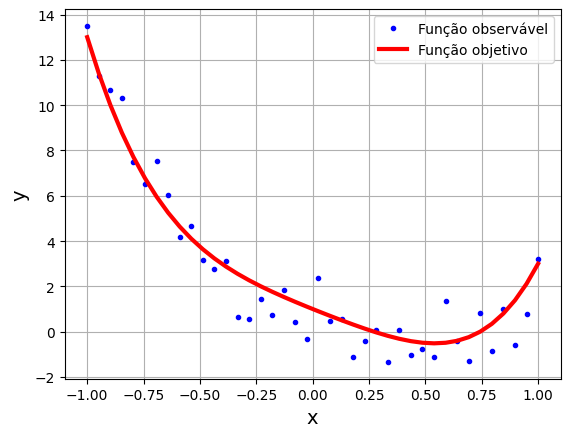

In [ ]:
# Import all necessary modules.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import urllib
# Retrieve file from github.
url = 'https://raw.githubusercontent.com/zz4fap/t319_aprendizado_de_maquina/main/labs/lab5_functions.py'
urllib.request.urlretrieve(url, filename='./lab5_functions.py')
import lab5_functions as lab5

# Reset PN sequence generator to a known state.
np.random.seed(42)

# Define the number of examples.
N = 40

# Generate the dataset.
x, y, y_noisy = lab5.generateDataSet(N)

# Plot the comparison between the true model and its noisy version.
plt.plot(x, y_noisy, 'b.', label='Função observável')
plt.plot(x, y, 'r', linewidth=3, label='Função objetivo')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

2. Após analisar o gráfico acima, responda: Seria possível aproximar o modelo gerador com uma função hipótese que fosse a equação de uma reta do tipo $\hat{y} = \hat{a}_0 + \hat{a}_1 x$?

**Justifique sua resposta.**

**DICA**
+ Se baseie nas explicações do seguinte exemplo: [polynomial_regression.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/polynomial_regression.ipynb).


**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>

3. Execute a célula de código abaixo e analise os gráficos resultantes.

+ No trecho de código abaixo, comparamos o resultado de aproximações do modelo gerador utilizando funções hipótese polinomais de ordens 1, 2, 4, 20 e 40.
+ Para isso, criamos um laço de repetição que treina um modelo polinomial com cada uma das ordens definidas a cada nova iteração.
+ Após o treinamento, realizamos a predição com os valores utilizados durante o treinamento e calculamos o erro quadrático médio entre os valores preditos e os valores esperados (i.e., os rótulos).
+ Para criar os modelos, utilizamos 4 classes da biblioteca SciKit-Learn: `PolynomialFeatures`, `StandardScaler`, `LinearRegression` e `Pipeline`, as quais têm suas funções explicadas de forma sucinta a seguir:<br/>
   + `PolynomialFeatures`: Cria a matriz de atributos polinomial de acordo com a ordem passada para o construtor da classe. O objeto desta classe transforma os atributos de entrada, criando combinações polinomiais com grau igual ao especificado. A classe pode ser configurada para adicionar a coluna do atributo de bias ou não através do parâmetro `include_bias`. Por padrão, `include_bias=True`, porém, como na sequência nós padronizamos à matriz de atributos polinomial, se ela contiver a coluna com valores iguais a 1, a padronização fará com que os valores desta coluna se tornem todos iguais a zero, fazendo com que o modelo não se ajuste bem aos dados. Para mais informações, leia a documentação da classe: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures).
   + `StandardScaler`: Realiza a padronização dos atributos. O escalonamento de atributos se torna imprescindível quando utilizamos funções hipótese polinomiais, pois os termos do polinômio podem fazer com que os valores dos atributos tenham valores muito grandes. Por exemplo, se $x$ varia entre 0 e 10, $x^2$ irá variar entre 0 e 100 e assim por diante. Para mais informações, leia a documentação da classe: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler).
   + `LinearRegression`: Realiza a regressão linear com a matriz de atributos polinomial escalonada. A implementação desta classe utiliza a equação normal para resolver o problema da regressão. Para mais informações, leia a documentação da classe: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression).
   + `Pipeline`: Sequencializa a aplicação de transformadores (e.g., `PolynomialFeatures`, `StandardScaler`) aos dados e ao final treina ou realiza predições com o objeto da classe `LinearRegression`. Para mais informações, leia a documentação da classe: [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline).

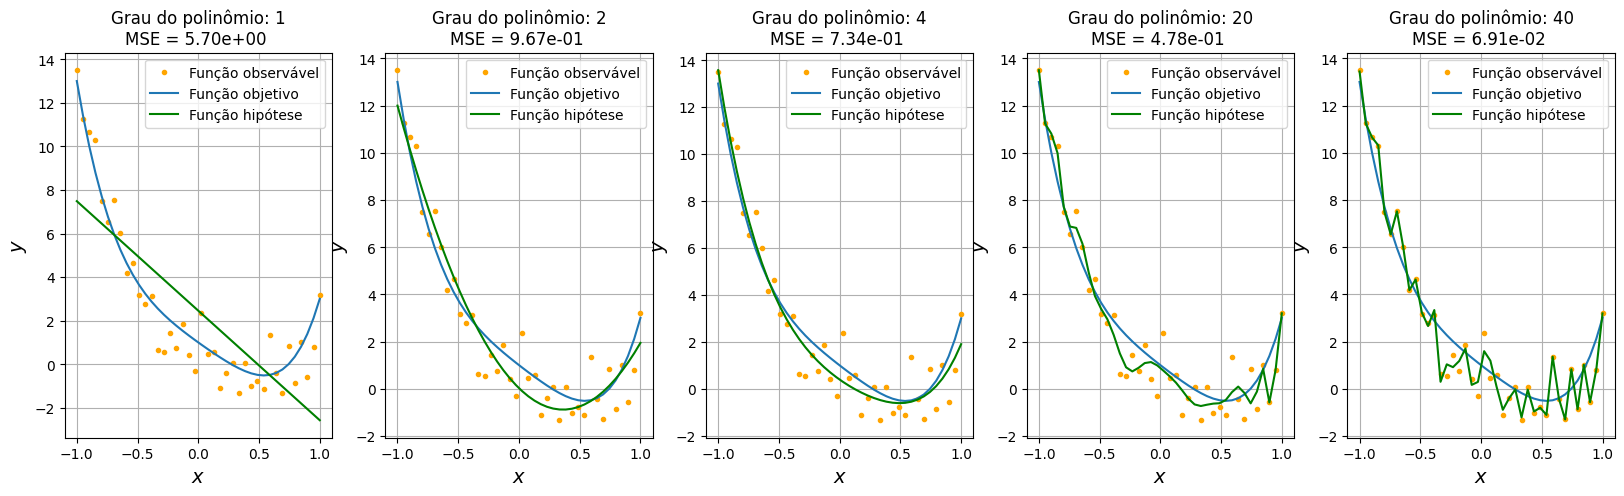

In [ ]:
# Polinomial degrees to be tested.
degrees = [1, 2, 4, 20, 40]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    poly_reg.fit(x, y_noisy)

    # Use the trained model for prediction.
    y_pred = poly_reg.predict(x)

    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, y_pred)

    # Plot the comparison of results.
    plt.plot(x, y_noisy, '.', color='orange', label='Função observável')
    plt.plot(x, y, label='Função objetivo')
    plt.plot(x, y_pred, 'g', label='Função hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))

# Show the plot.
plt.show()

4. Após analisar os gráficos acima, responda:

  1. Dentre estes 5 modelos polinomiais, qual deles melhor aproxima o modelo gerador? Qual a ordem deste modelo?
  2. Qual efeito está ocorrendo no primeiro gráfico, o que mostra a aproximação usando um modelo polinomial de ordem 1?
  3. Qual efeito está ocorrendo no último gráfico, o que mostra a aproximação usando um modelo polinomial de ordem 40?

**Justifique todas as respostas.**

**DICA**
+ Para justificar suas respostas, fale sobre a flexbilidade e capacidade de generalização dos modelos.
+ Se baseie nas explicações do seguinte exemplo: [polynomial_regression.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/polynomial_regression.ipynb).

**Resposta**

<span style="color:blue">Digite abaixo as respostas do exercício.</span>

5. Execute a célula de código abaixo e analise o gráfico resultante.

+ Neste exercício, criamos 2 conjuntos, um de treinamento e outro de validação, com exemplos que não são utilizados durante o treinamento do modelo. Os exemplos do conjunto de validação são usados para medir a capacidade de generalização do modelo. Lembre-se que o nosso objetivo é encontrar um modelo que faça boas predições para dados inéditos.
+ No trecho de código abaixo, comparamos os erros calculados com os conjuntos de treinamento e de validação utilizando funções hipótese polinomais de ordens 1 a 24.
+ No código abaixo, criamos um laço de repetição que treina um modelo polinomial para cada uma das ordens definidas a cada nova iteração.
+ Após o treinamento, realizamos a predição com os exemplos de treinamento e validação e calculamos o erro quadrático médio entre os valores preditos pelo modelo e os valores esperados para ambos os conjuntos.
+ Ao final, teremos 2 vetores com os valores do erro quadrático médio para cada uma das ordens dos polinômios para os conjuntos de treinamento e validação, respectivamente.
+ Esses dois vetores com os erros de treinamento e validação para os vários graus são plotados na figura abaixo.

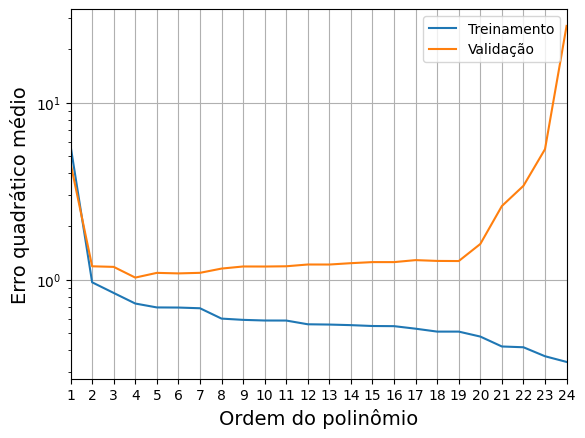

In [ ]:
# reset PN sequence generator.
np.random.seed(42)

# Generate the training dataset.
N = 40
x_train, y_train, y_noisy_train = lab5.generateDataSet(N)

# Generate the validation dataset.
N = 100
x_test, y_test, y_noisy_test = lab5.generateDataSet(N)

# Polinomial degrees to be tested.
maxOrder = 25
degrees = range(1, maxOrder)

mse_train = np.zeros((len(degrees),))
mse_test = np.zeros((len(degrees),))
for i in range(0, len(degrees)):

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    poly_reg.fit(x_train, y_noisy)

    # Use the trained model for prediction.
    y_pred_train = poly_reg.predict(x_train)

    # Use the trained model for prediction.
    y_pred_test = poly_reg.predict(x_test)

    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse_train[i] = mean_squared_error(y_noisy_train, y_pred_train)

    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse_test[i] = mean_squared_error(y_noisy_test, y_pred_test)

# Plot training and validation error for all polynomial degrees.
plt.plot(degrees, mse_train, label='Treinamento')
plt.plot(degrees, mse_test, label='Validação')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático médio', fontsize=14)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlim(1,maxOrder-1)
plt.xticks(range(1,maxOrder,1))
# Show the plot.
plt.show()

6. De posse das seguintes informações:

  + O efeito do subajuste pode ser verificado quando ambos os erros de treinamento e validação são altos.
  + O efeito do sobreajuste pode ser verificado quando o erro de treinamento é muito pequeno em relação ao erro de validação, que é muito grande.
  + O comportamento ideal do modelo é encontrado quando ambos os erros são pequenos e próximos. Isso indica que uma relação de compromisso entre flexibilidade e capacidade de generalização foi encontrada. Acima deste ponto, o modelo se sobreajusta e abaixo dele, o modelo se subajusta. O ponto do comportamento (i.e., grau) ideal é normalmente encontrado quando o erro de validação para de diminuir e passa a aumentar.

e após analisar o gráfico acima, responda:

  1. Qual ordem do polinômio aproximador apresenta o comportamento ideal?
  2. A partir de qual ordem o modelo se subajuste aos dados de treinamento?
  3. A partir de qual ordem o modelo se sobreajuste aos dados de treinamento?

**Justifique todas as respostas.**

**Respostas**

<span style="color:blue">Digite abaixo as respostas do exercício.</span>